### Saikrishna S
### Image to Pencil Sketch Task
### We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python

In [2]:
! pip install opencv-python

In [3]:
! pip install IPython

In [4]:
import cv2
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

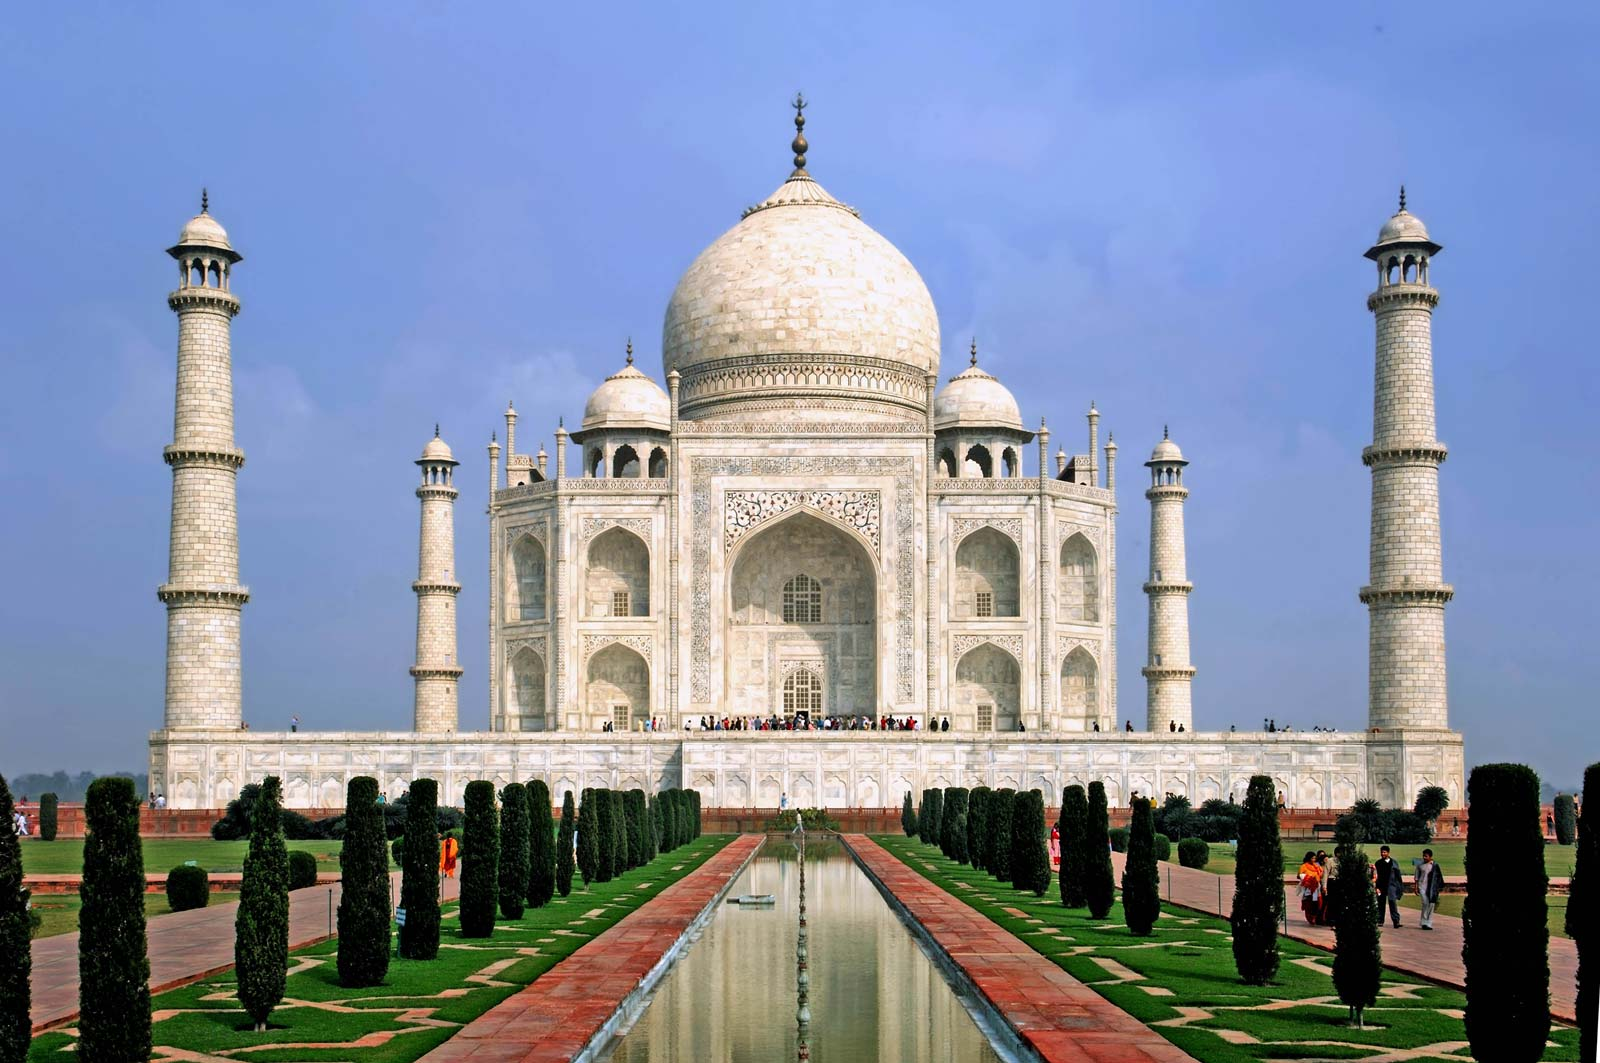

In [6]:
Image(filename = "image1.jpg")
#This is the original image

In [34]:
# Reading as a color image
image = cv2.imread('image1.jpg')
print(image)
#Represented as a numpy array

[[[223 151 117]
  [223 151 117]
  [223 151 117]
  ...
  [219 148 114]
  [219 148 114]
  [219 148 114]]

 [[223 151 117]
  [223 151 117]
  [223 151 117]
  ...
  [219 148 114]
  [219 148 114]
  [219 148 114]]

 [[223 151 117]
  [223 151 117]
  [223 151 117]
  ...
  [219 148 114]
  [219 148 114]
  [219 148 114]]

 ...

 [[  0   2   0]
  [  1   7   2]
  [  0   6   1]
  ...
  [255 255 255]
  [253 253 253]
  [255 255 255]]

 [[  0   2   0]
  [  0   3   0]
  [  0   3   0]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[  2   8   3]
  [  0   6   1]
  [  0   2   0]
  ...
  [255 255 255]
  [255 255 255]
  [253 253 253]]]


In [35]:
print(image.shape,"\n",image.dtype)
# 3 channels RGB

(1063, 1600, 3) 
 uint8


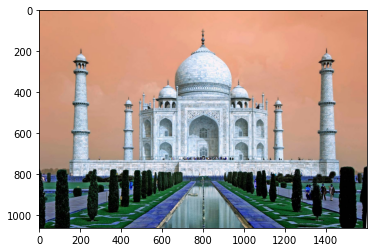

In [36]:
plt.imshow(image)

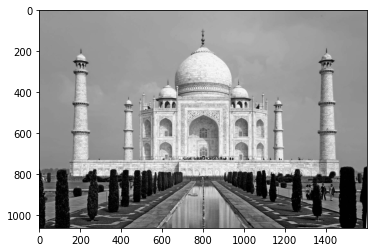

In [28]:
#displaying the grayscale image
plt.imshow(image,cmap="gray")

In [32]:
cv2.imshow("image",image)

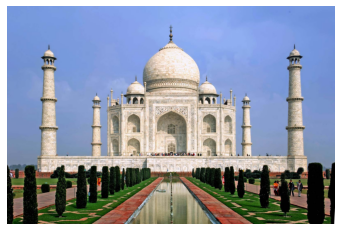

In [38]:
plt.imshow(image[:,:,::-1])
plt.axis(False)
plt.show()

In [39]:
#Converting color image to grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image

array([[149, 149, 149, ..., 146, 146, 146],
       [149, 149, 149, ..., 146, 146, 146],
       [149, 149, 149, ..., 146, 146, 146],
       ...,
       [  1,   5,   4, ..., 255, 253, 255],
       [  1,   2,   2, ..., 255, 255, 254],
       [  6,   4,   1, ..., 255, 255, 253]], dtype=uint8)

In [40]:
#Inverting the grayscale image
invtd_img = 255-gray_image
invtd_img

array([[106, 106, 106, ..., 109, 109, 109],
       [106, 106, 106, ..., 109, 109, 109],
       [106, 106, 106, ..., 109, 109, 109],
       ...,
       [254, 250, 251, ...,   0,   2,   0],
       [254, 253, 253, ...,   0,   0,   1],
       [249, 251, 254, ...,   0,   0,   2]], dtype=uint8)

In [45]:
#Blurring the grayscale image 
blur_image=cv2.GaussianBlur(invtd_img, (111,111),0)
blur_image

array([[106, 106, 106, ..., 110, 110, 110],
       [106, 106, 106, ..., 110, 110, 110],
       [106, 106, 106, ..., 110, 110, 110],
       ...,
       [242, 241, 241, ..., 208, 208, 208],
       [242, 241, 241, ..., 208, 208, 208],
       [242, 241, 241, ..., 208, 208, 208]], dtype=uint8)

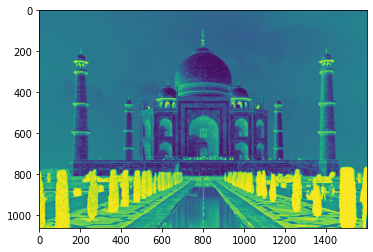

In [47]:
plt.imshow(invtd_img)

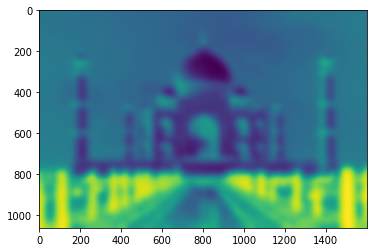

In [46]:
plt.imshow(blur_image)

In [48]:
invtd_blur_image = 255 -blur_image
invtd_blur_image

array([[149, 149, 149, ..., 145, 145, 145],
       [149, 149, 149, ..., 145, 145, 145],
       [149, 149, 149, ..., 145, 145, 145],
       ...,
       [ 13,  14,  14, ...,  47,  47,  47],
       [ 13,  14,  14, ...,  47,  47,  47],
       [ 13,  14,  14, ...,  47,  47,  47]], dtype=uint8)

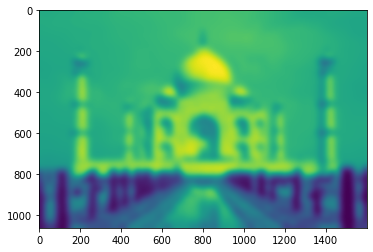

In [49]:
plt.imshow(invtd_blur_image)

In [51]:
sketch=cv2.divide(gray_image,invtd_blur_image, scale=256.0)
sketch

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 20,  91,  73, ..., 255, 255, 255],
       [ 20,  37,  37, ..., 255, 255, 255],
       [118,  73,  18, ..., 255, 255, 255]], dtype=uint8)

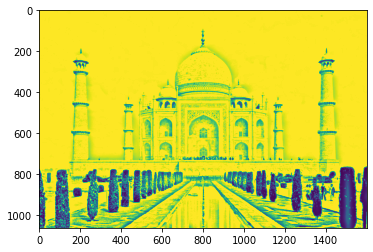

In [52]:
plt.imshow(sketch)

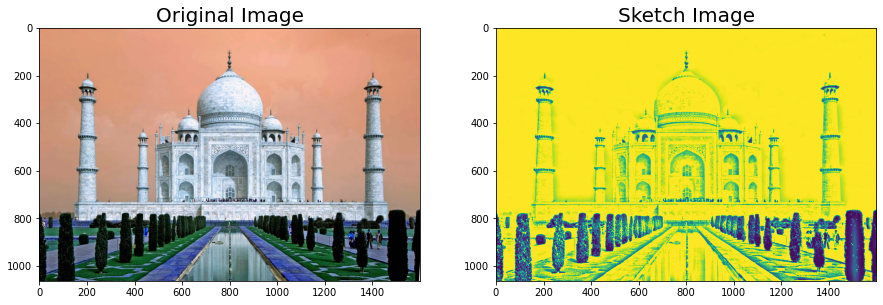

In [54]:
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
plt.title("Original Image",size=20)
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("Sketch Image",size=20)
plt.imshow(sketch)